In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [10]:
data = pd.read_csv(r'C:\Users\vmadmin\Documents\ML App\Pokemon.csv')


In [ ]:
#DATA TRANSFORMATION PIPELINE 
#sequentially apply transformers then an estimator

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline


numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')), ('encoder', OrdinalEncoder())])



In [ ]:
#pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ???? kmeans)])

In [20]:
from sklearn.preprocessing import StandardScaler
skills = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
scaler = StandardScaler()
fitted_scaler = scaler.fit_transform(data[skills])


In [21]:
from sklearn.cluster import KMeans

inertia = []
for cluster in range(1, 15):
    kmeans = KMeans(n_clusters=cluster, init="k-means++", random_state=49)
    kmeans.fit(fitted_scaler)
    inertia.append(kmeans.inertia_)

C:\Users\vmadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vmadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vmadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

Text(0.5, 1.0, 'Elbow Chart to Select K')

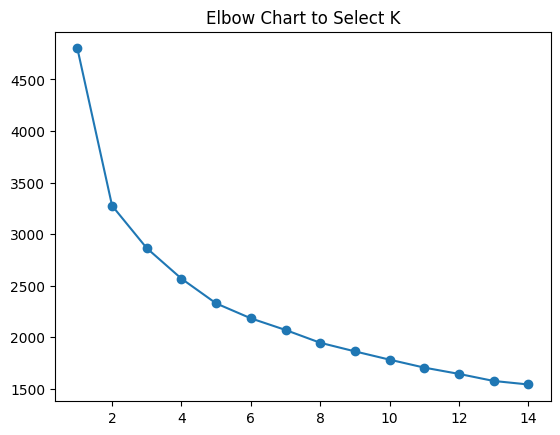

In [17]:
plt.plot(range(1,15), inertia)
plt.scatter(range(1,15), inertia)
plt.title('Elbow Chart to Select K')

In [22]:
# find clusters now using K selected based on chart above
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=49)
kmeans.fit(fitted_scaler)
data['cluster'] = kmeans.labels_

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
centroids.columns = skills
centroids['cluster'] = [0, 1, 2, 3, 4]


C:\Users\vmadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


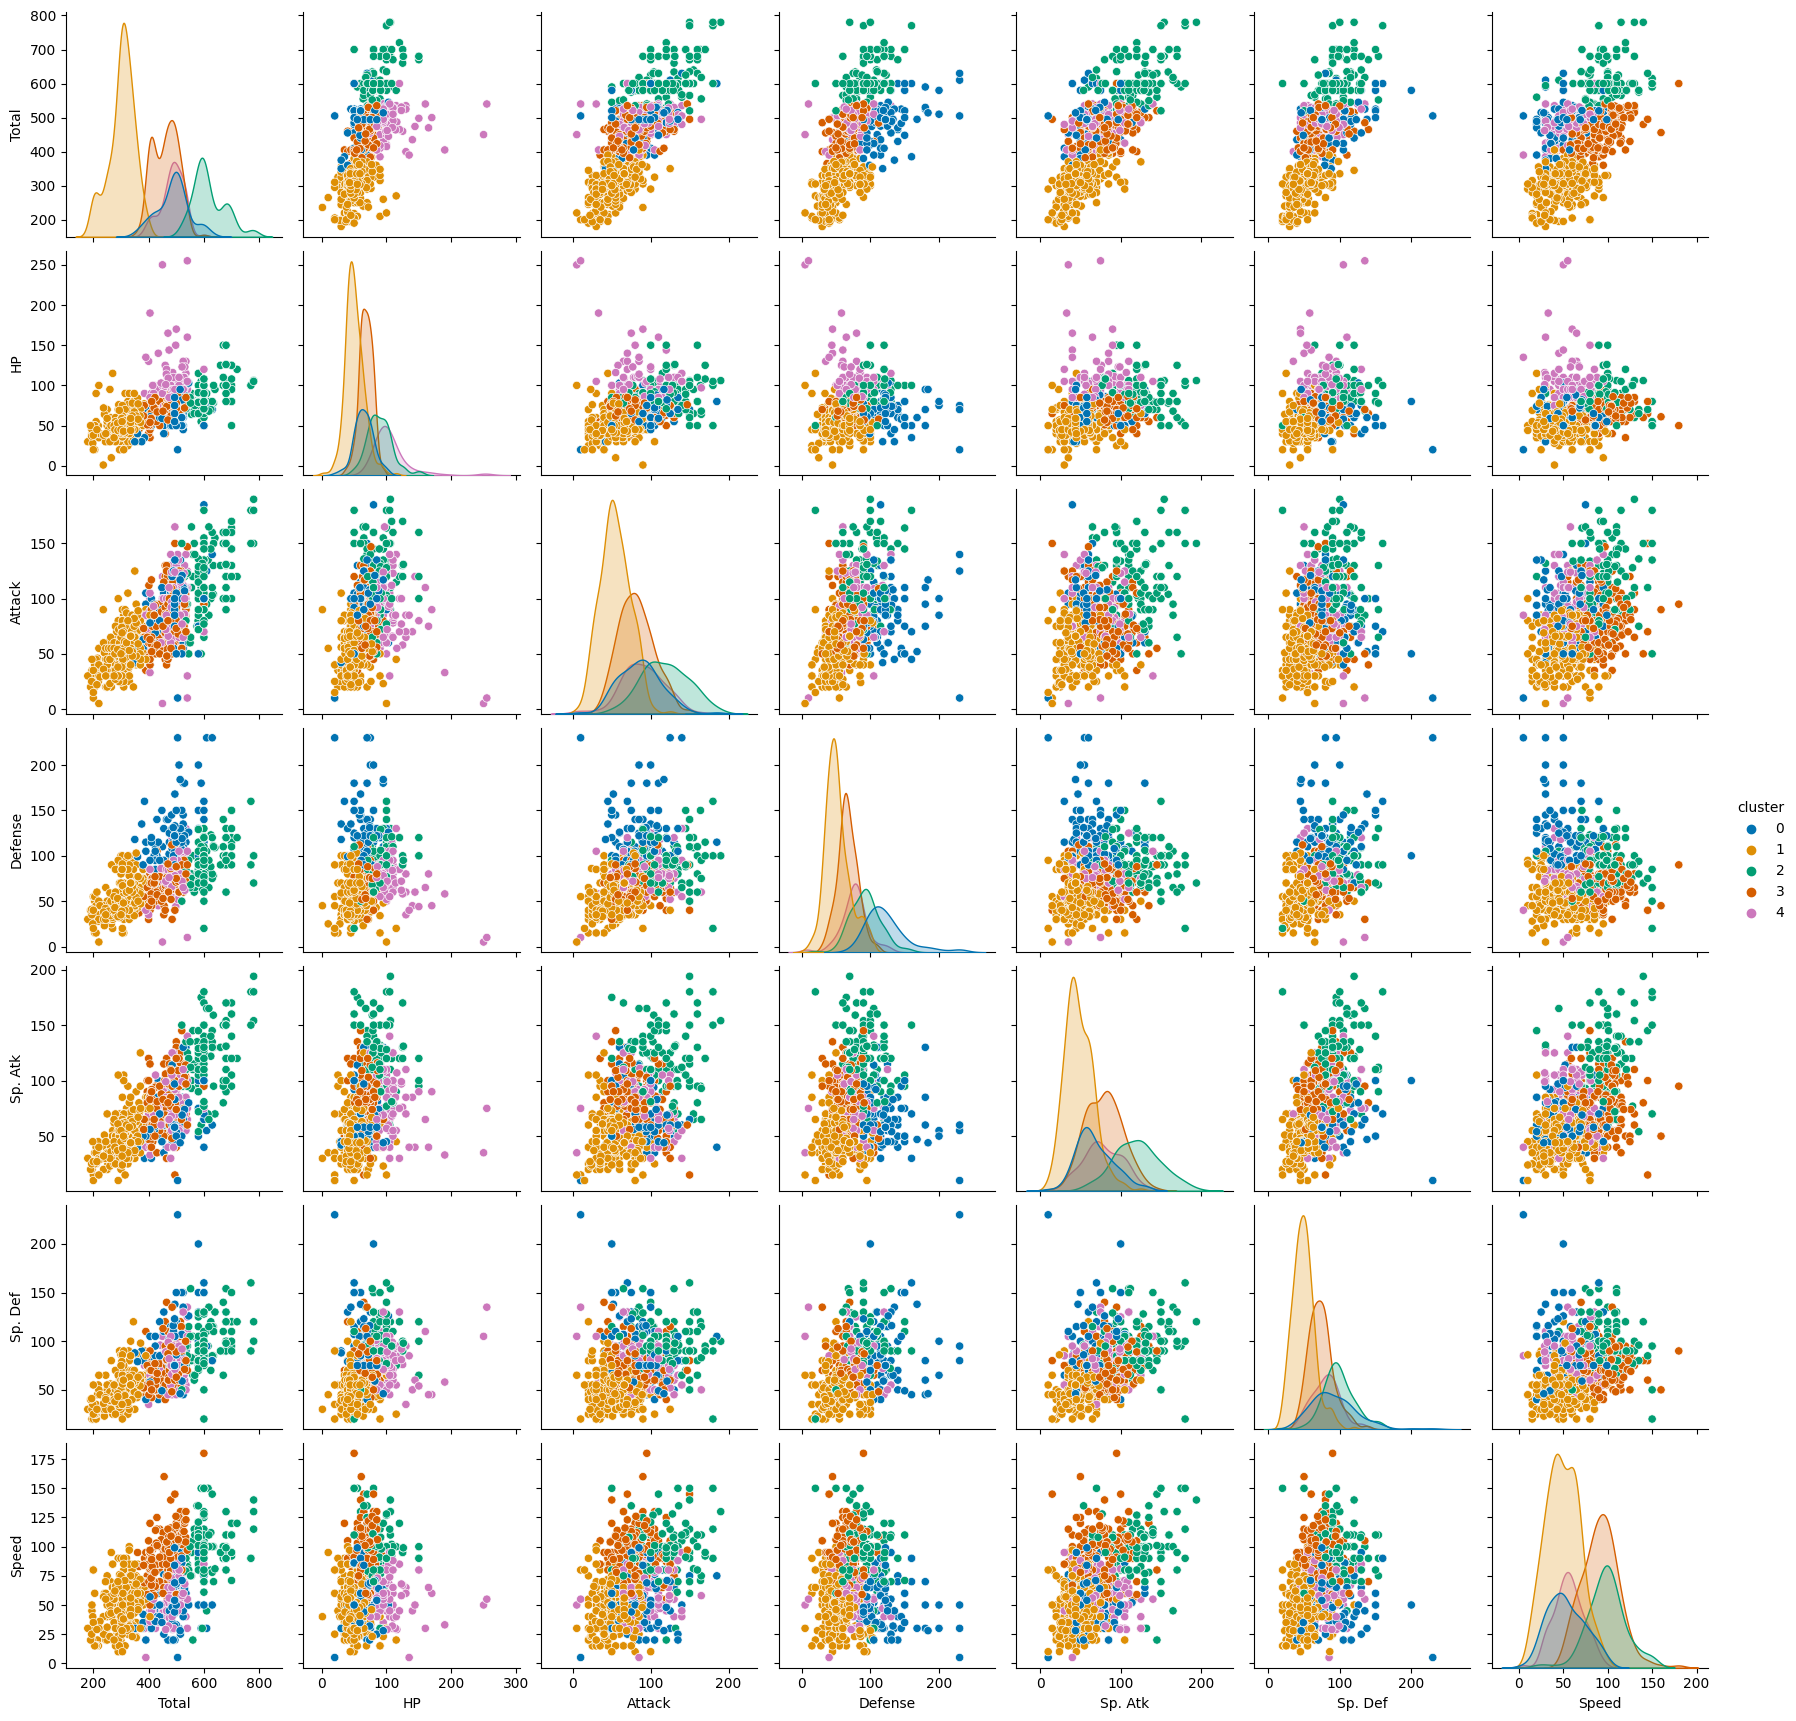

In [28]:
sns.pairplot(data[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', "cluster"]], palette="colorblind" ,hue = "cluster");

In [29]:
data.groupby(['cluster']).agg({
    'HP': 'median', 
    'Attack': 'median', 
    'Defense': 'median', 
    'Sp. Atk': 'median', 
    'Sp. Def': 'median', 
    'Speed': 'median'
})

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
cluster,,,,,,
0,65.0,85.0,115.0,60.0,85.0,50.0
1,50.0,53.0,50.0,45.0,49.5,50.0
2,90.0,120.0,90.0,120.0,95.5,100.0
3,69.0,80.0,65.0,80.0,70.0,91.0
4,100.0,90.0,76.0,75.0,80.0,55.0


In [30]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,2
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,2
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,2
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,2


In [31]:
kmeans.cluster_centers_

array([[-0.17819131,  0.22613903,  1.58139175, -0.14298186,  0.72539815,
        -0.52604295],
       [-0.74065647, -0.76584207, -0.70919528, -0.75106286, -0.8187721 ,
        -0.65779011],
       [ 0.78404906,  1.21975913,  0.60510516,  1.45521899,  0.95874549,
         1.04006321],
       [-0.0501304 ,  0.07189561, -0.23108308,  0.19023475,  0.05624169,
         0.81082203],
       [ 1.44531881,  0.32382084,  0.08057486,  0.15098772,  0.29733067,
        -0.43144045]])

In [35]:
data.to_csv("PokemonClustered.csv", index=False)
# diff = kmeans.cluster_centers_ - np.array(#new data)